# Global Power Plant Database

Project Description


The Global Power Plant Database is a comprehensive, open source database of power plants
around the world. It centralizes power plant data to make it easier to navigate, compare and
draw insights for one’s own analysis. 

The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and
entries contain information on plant capacity, generation, ownership, and fuel type. It will be
continuously updated as data becomes available.


# Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS- WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for
the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the &quot;Fuel Type&quot; attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [34]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv', sep=',')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
!pip install imbalanced-learn

In [26]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [27]:
conda update -n base -c defaults conda



Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [35]:
#preprocessing data

df.shape

(907, 27)

# Exploratory Data Analysis

In [36]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [38]:
#checking for duplicate values

df.drop_duplicates(inplace=True)


In [39]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

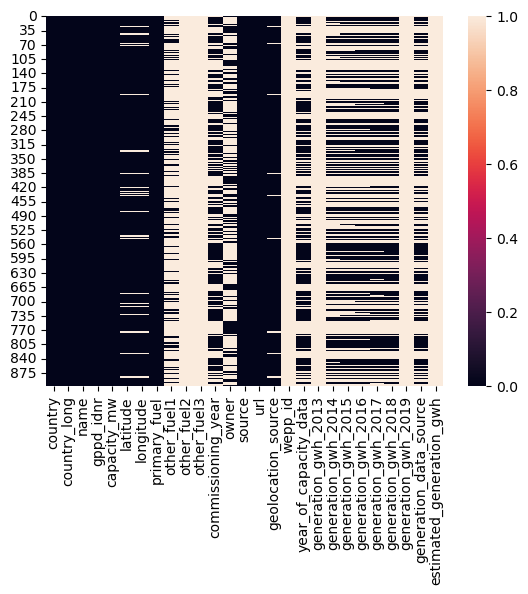

In [40]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

In [41]:
df_copy=df.copy()
                       
df_copy                     

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_copy.rename(columns={'primary_fuel':'Primary Fuel'},inplace=True)


In [43]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Primary Fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [44]:
#Lets remove irrelevant columns:
#Columns, named, country, country_long, other_fuel2,year_of_capacity_data and generation_data_source has only 1 unique value, 
#other_fuel3, wepp_id,estimated_generation_gwh are filled with NAN values so we can drop them.  

df_copy.drop(columns=['country','country_long','other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh',],axis=1,inplace=True)


In [ ]:
#Column contains name and gppd_idnr contains the unique id and url is not related to the target so we can drop them.

df_copy.drop(columns=['name','gppd_idnr','url'],axis=1,inplace=True)

In [47]:
df_copy.drop(columns=['owner'],axis=1,inplace=True)

In [48]:
df_copy.drop(columns=['generation_gwh_2013'],axis=1,inplace=True)

In [49]:
df_copy.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Primary Fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [50]:
#checking the value counts of each column

for i in df_copy.columns:
    print(df_copy[i].value_counts())
    print("\n")

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Primary Fuel, dtype: int64


Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype

These are the value counts of all columns, let's check the unique value of column.

In [51]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df_copy.dtypes.index:
    if df_copy.dtypes[i]!="float":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df_copy.dtypes.index:
    if df_copy.dtypes[i]=="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['Primary Fuel', 'other_fuel1', 'source', 'geolocation_source']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']


In [52]:
df_copy.drop(columns=['generation_gwh_2018', 'generation_gwh_2019'],axis=1,inplace=True)

In [53]:
#Filling null values in columns with its mean

df_copy['latitude']=df_copy['latitude'].fillna(df_copy['latitude'].mean())

df_copy["other_fuel1"]=df_copy['other_fuel1'].fillna(df_copy['other_fuel1'].mode()[0])
df_copy['geolocation_source']=df_copy['geolocation_source'].fillna(df_copy['geolocation_source'].mode()[0])


In [54]:
#Because the below columns have skewness and outliers so we will use median method to fix null issue:


df_copy["longitude"]=df_copy['longitude'].fillna(df_copy['longitude'].median())
df_copy["generation_gwh_2014"]=df_copy['generation_gwh_2014'].fillna(df_copy['generation_gwh_2014'].median())
df_copy["generation_gwh_2015"]=df_copy['generation_gwh_2015'].fillna(df_copy['generation_gwh_2015'].median())
df_copy["generation_gwh_2016"]=df_copy['generation_gwh_2016'].fillna(df_copy['generation_gwh_2016'].median())
df_copy["generation_gwh_2017"]=df_copy['generation_gwh_2017'].fillna(df_copy['generation_gwh_2017'].median())

df_copy

,capacity_mw,latitude,longitude,Primary Fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250
1,98.0,24.7663,74.6090,Coal,Oil,NaN,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250
2,39.2,21.9038,69.3732,Wind,Oil,NaN,CDM,WRI,801.123775,711.181225,737.205450,817.977250
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000
903,3.0,12.8932,78.1654,Solar,Oil,NaN,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250
904,25.5,15.2758,75.5811,Wind,Oil,NaN,CDM,WRI,801.123775,711.181225,737.205450,817.977250
905,80.0,24.3500,73.7477,Coal,Oil,NaN,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250


In [55]:
df_copy.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
Primary Fuel             0
other_fuel1              0
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [56]:
#Since we still see null value in commissioning year, we will fill the null values

df1=df_copy.dropna(subset=['commissioning_year'])

In [57]:
df1

,capacity_mw,latitude,longitude,Primary Fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000
6,60.0,10.4547,77.0078,Hydro,Oil,1970.0,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...,...
892,16.0,17.1401,73.8660,Hydro,Oil,1998.0,Central Electricity Authority,WRI,801.123775,711.181225,737.205450,817.977250
893,62.4,30.3033,77.5684,Hydro,Oil,1991.0,Central Electricity Authority,WRI,184.453100,183.000000,204.253600,175.866250
899,600.0,30.1081,77.3257,Coal,Oil,2007.0,Central Electricity Authority,WRI,3194.359820,3709.552200,3123.572061,3156.053669
901,106.6,13.1156,77.5838,Oil,Oil,1993.0,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,817.977250


In [58]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['Primary Fuel', 'other_fuel1', 'source', 'geolocation_source']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']


# Data Visualization 


Univariate Analysis

Plotting categorical columns

Hydro      251
Coal       189
Gas         59
Oil         12
Solar        8
Nuclear      8
Name: Primary Fuel, dtype: int64


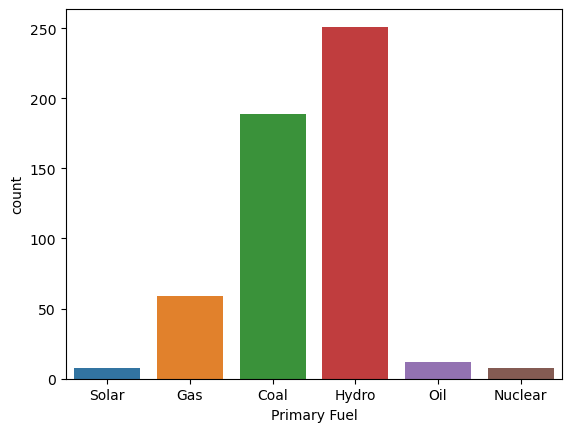

In [59]:
#visualize the number of primary fuel column

ax=sns.countplot(x= 'Primary Fuel',data=df1)
print(df1['Primary Fuel'].value_counts())


Central Electricity Authority           519
National Renewable Energy Laboratory      8
Name: source, dtype: int64


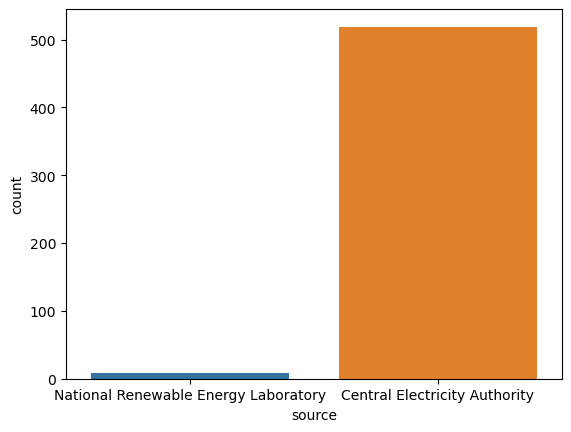

In [60]:
#visualize the number of source

ax=sns.countplot(x= 'source',data=df1)
print(df1['source'].value_counts())


Oil             524
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


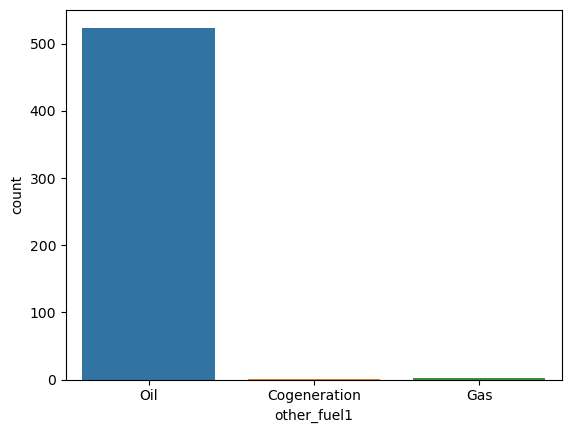

In [61]:
#visualize the number of fuel1 energy

ax=sns.countplot(x= 'other_fuel1',data=df1)
print(df1['other_fuel1'].value_counts())


In [ ]:
df1.describe().round(3)

This gives the statistical information of the numerical columns.

From the above description we can observe the following:

The counts of all the columns are same which means there are no missing values in the data set.

The mean value is higher than the median(50%) in the above described column which means the data is skewed to right in those columns.

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

We can also notice the Standard deviation, min 25% values from the described method.

# Bivariate Analysis


In [ ]:
#After observing the correlation graph, we plot two variable graph to check the relation between commissioning years and capacity_mw 

sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df1,palette='colorblind')

we can see that the relation is positive linear relation as the recent years have more capacity of power plant.

In [ ]:
#Lets compare latitude of the power plant with the capacity_mw

sns.scatterplot(x='latitude',y='capacity_mw',data=df1,palette='colorblind')

 There is no linear relation between latitude and capacity_mw, there are some outlier present. 

In [ ]:
#Lets compare longitude of the power plant with the capacity_mw

sns.scatterplot(x='longitude',y='capacity_mw',data=df1,palette='colorblind')

There is no linear relation, the longitude between 73 till 89 has capacity upto 2000 and there are outlier present.

In [ ]:
#lets check each generation plot 

fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.lineplot(data=df1,x="generation_gwh_2014",y="capacity_mw",ax=axes[0,0])
sns.lineplot(data=df1,x="generation_gwh_2015",y="capacity_mw",ax=axes[0,1])
sns.lineplot(data=df1,x="generation_gwh_2016",y="capacity_mw",ax=axes[1,0])
sns.lineplot(data=df1,x="generation_gwh_2017",y="capacity_mw",ax=axes[0,1])


In [ ]:
#lets check each generation plot 

fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.barplot(data=df1,x="Primary Fuel",y="generation_gwh_2014",ax=axes[0,0])
sns.barplot(data=df1,x="Primary Fuel",y="generation_gwh_2015",ax=axes[0,1])
sns.barplot(data=df1,x="Primary Fuel",y="generation_gwh_2016",ax=axes[1,0])
sns.barplot(data=df1,x="Primary Fuel",y="generation_gwh_2017",ax=axes[0,1])


In [ ]:
df1=df1.drop(df1.columns[-1],axis=1)

# Multivariate Analysis

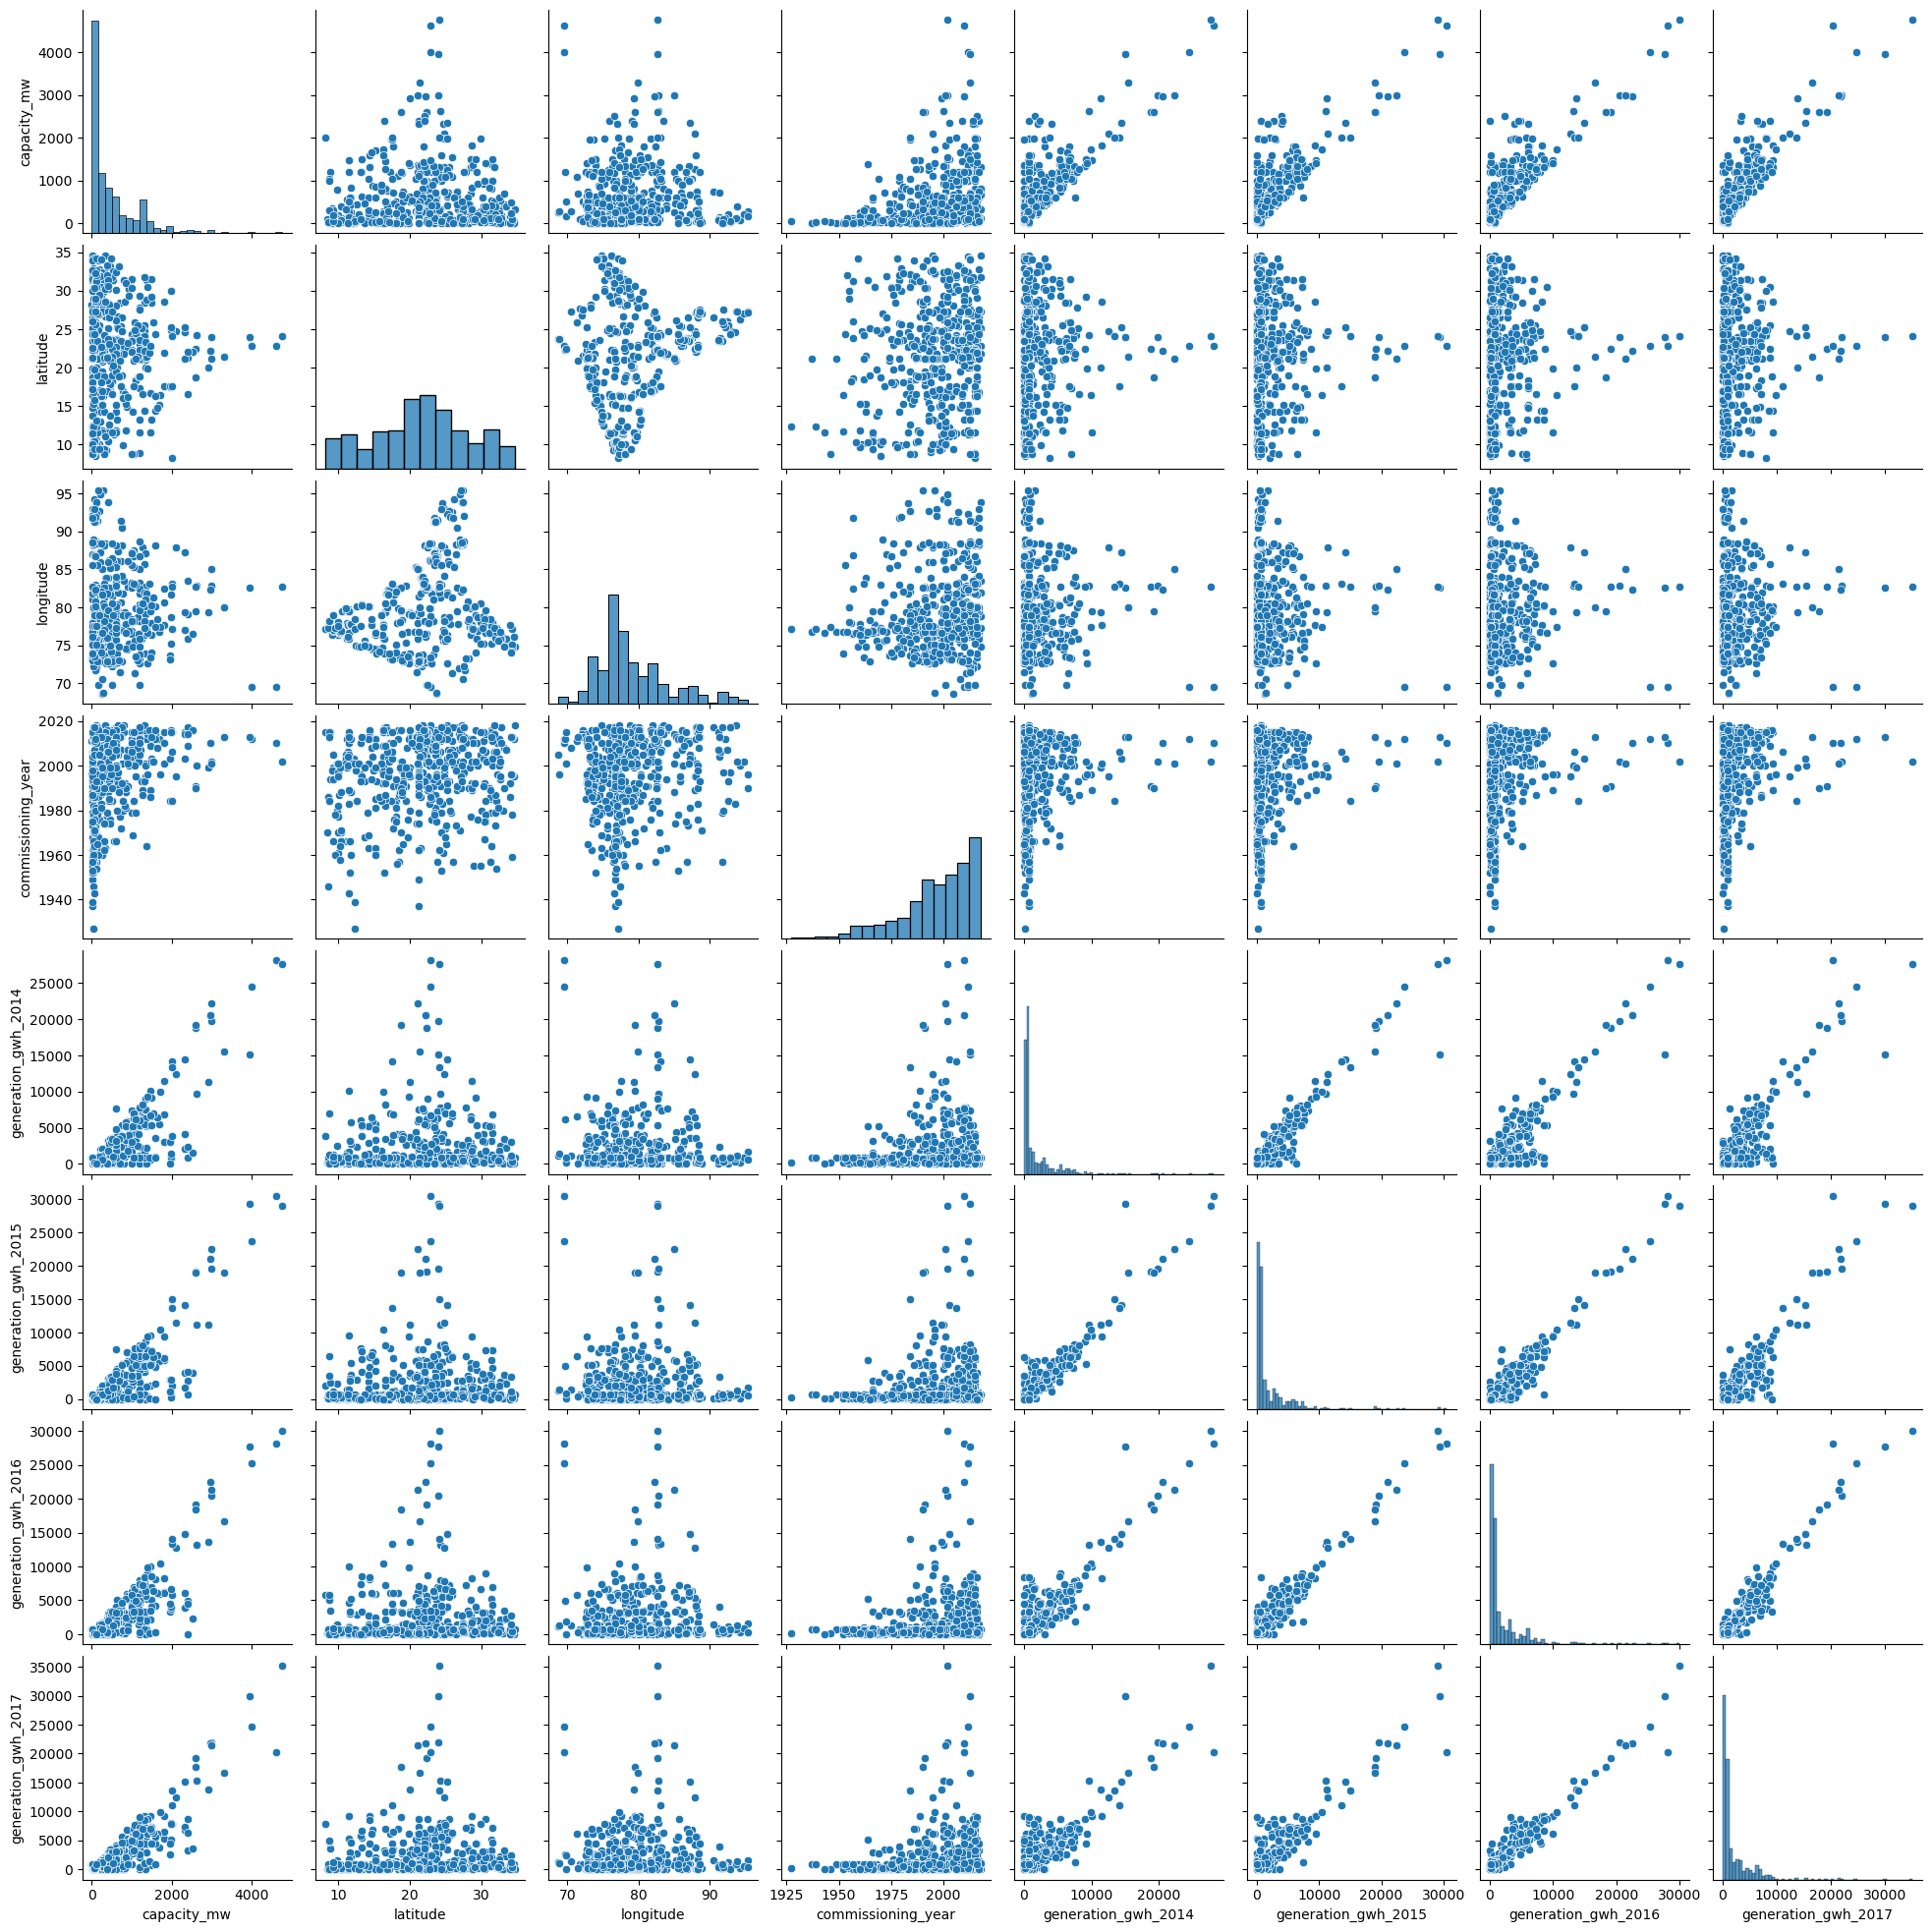

In [62]:
sns.pairplot(df1)

After looking at the correlation graph, we can observe the relation between the features and label. 
The features mostly have strong linear relation but some have outliers present. 

<AxesSubplot:>

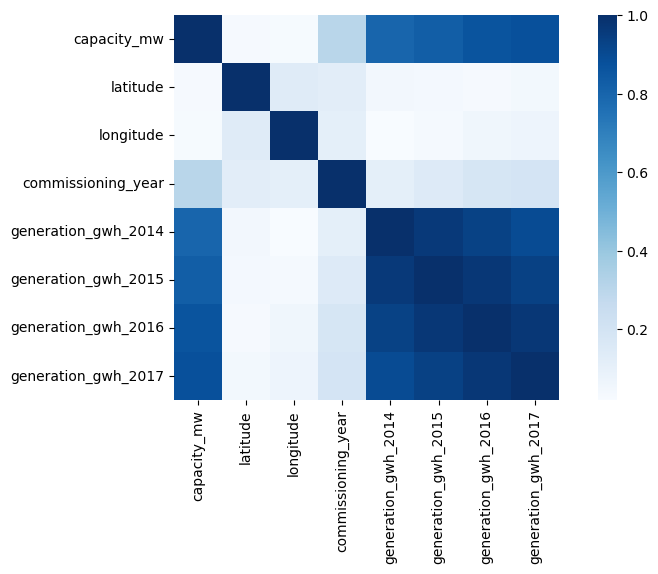

In [63]:
#Correlation Map

cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),
           cmap="Blues",square=True, ax= ax)

#  Visualizing the correlation between label and features using bar plot 

In [ ]:
df1.shape

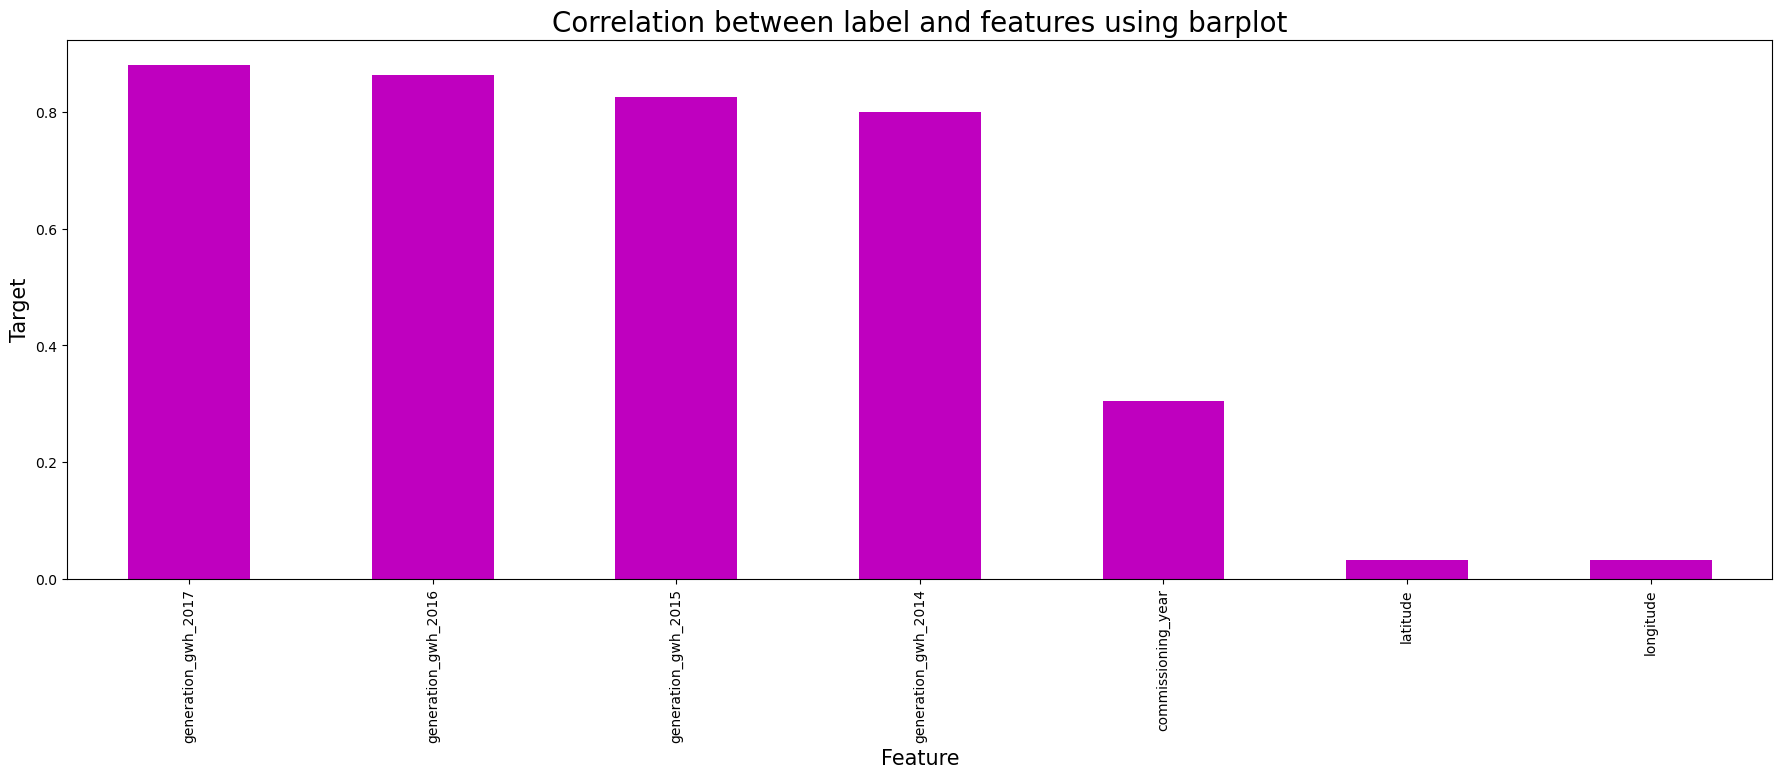

In [64]:
plt.figure(figsize = (22,7))

df1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color ="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()


# ## Checking for Outlier

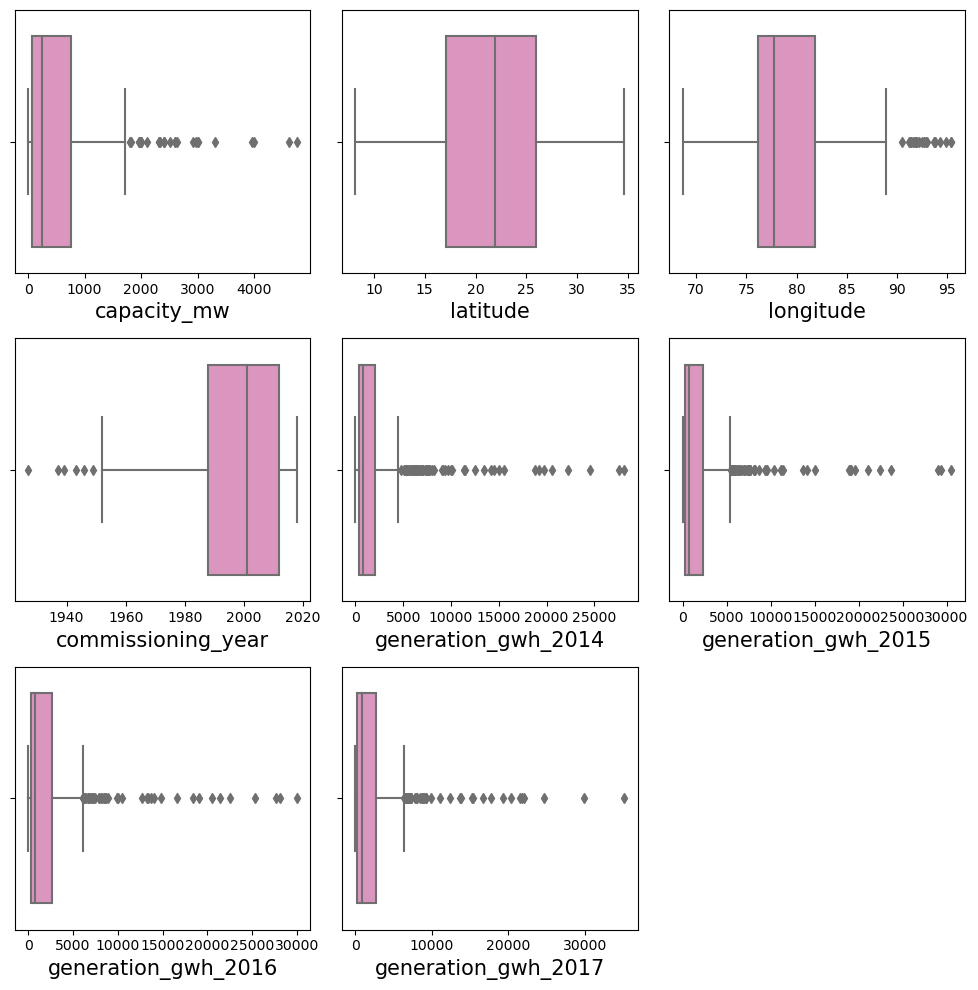

In [65]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,10), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        #plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


In [66]:

from scipy.stats import zscore

out_features=df1[['capacity_mw','latitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
z=np.abs(zscore(out_features))
z

,capacity_mw,latitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.758845,0.998955,0.345514,0.360753,0.372080,0.371834
3,0.568987,0.338963,0.396950,0.325971,0.333236,0.411536
4,1.816766,0.046530,0.281367,1.004970,1.065220,0.804157
5,0.404206,0.323308,0.246675,0.230175,0.257593,0.286888
6,0.676454,1.714224,0.526071,0.507418,0.548495,0.559357
...,...,...,...,...,...,...
892,0.739501,0.691127,0.345514,0.360753,0.372080,0.371834
893,0.673015,1.323296,0.518525,0.499336,0.511208,0.537155
899,0.097304,1.293424,0.325923,0.425951,0.250887,0.230135
901,0.609681,1.307014,0.570275,0.547351,0.564529,0.371834


In [67]:
#threshold =3
np.where(z>3)

(array([ 13,  13,  76,  76, 167, 167, 167, 167, 210, 210, 210, 210, 284,
        284, 284, 284, 284, 285, 285, 285, 285, 285, 380, 380, 380, 380,
        380, 388, 388, 388, 388, 403, 403, 403, 403, 403, 421, 421, 424,
        424, 424, 426, 426, 426, 426, 426, 451, 451, 451, 451, 451, 471,
        471, 471, 471, 471, 516, 516, 516, 516, 516], dtype=int64),
 array([0, 5, 0, 4, 2, 3, 4, 5, 2, 3, 4, 5, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5,
        0, 2, 3, 4, 5, 2, 3, 4, 5, 0, 2, 3, 4, 5, 2, 3, 2, 3, 4, 0, 2, 3,
        4, 5, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5], dtype=int64))

In [68]:
df2=df1[(z<3).all(axis=1)]
df2.shape

(512, 12)

In [69]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 527
new data frame 512


In [70]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 2.846299810246679


In [71]:
df2.shape

(512, 12)

# Encoding the categorical columns

In [ ]:
df2[categorical_col]

In [72]:
#Encoding categorical columns using Label Encoder

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in df2.columns:
    if df2[i].dtypes != 'float':
        df2[i]= LE.fit_transform(df2[i].values.reshape(-1,1))
df2

,capacity_mw,latitude,longitude,Primary Fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,5,2,2011.0,1,0,801.123775,711.181225,737.205450,817.977250
3,135.0,23.8712,91.3602,1,2,2004.0,0,1,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,0,2,2015.0,0,1,3035.550000,5916.370000,6243.000000,5385.579736
5,250.0,23.7689,68.6447,0,2,2005.0,0,1,1153.421000,1208.852000,1175.765000,1147.913000
6,60.0,10.4547,77.0078,2,2,1970.0,0,1,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...,...
892,16.0,17.1401,73.8660,2,2,1998.0,0,1,801.123775,711.181225,737.205450,817.977250
893,62.4,30.3033,77.5684,2,2,1991.0,0,1,184.453100,183.000000,204.253600,175.866250
899,600.0,30.1081,77.3257,0,2,2007.0,0,1,3194.359820,3709.552200,3123.572061,3156.053669
901,106.6,13.1156,77.5838,4,2,1993.0,0,1,0.000000,0.000000,0.000000,817.977250


# #Checking how the data has been distributed in each column

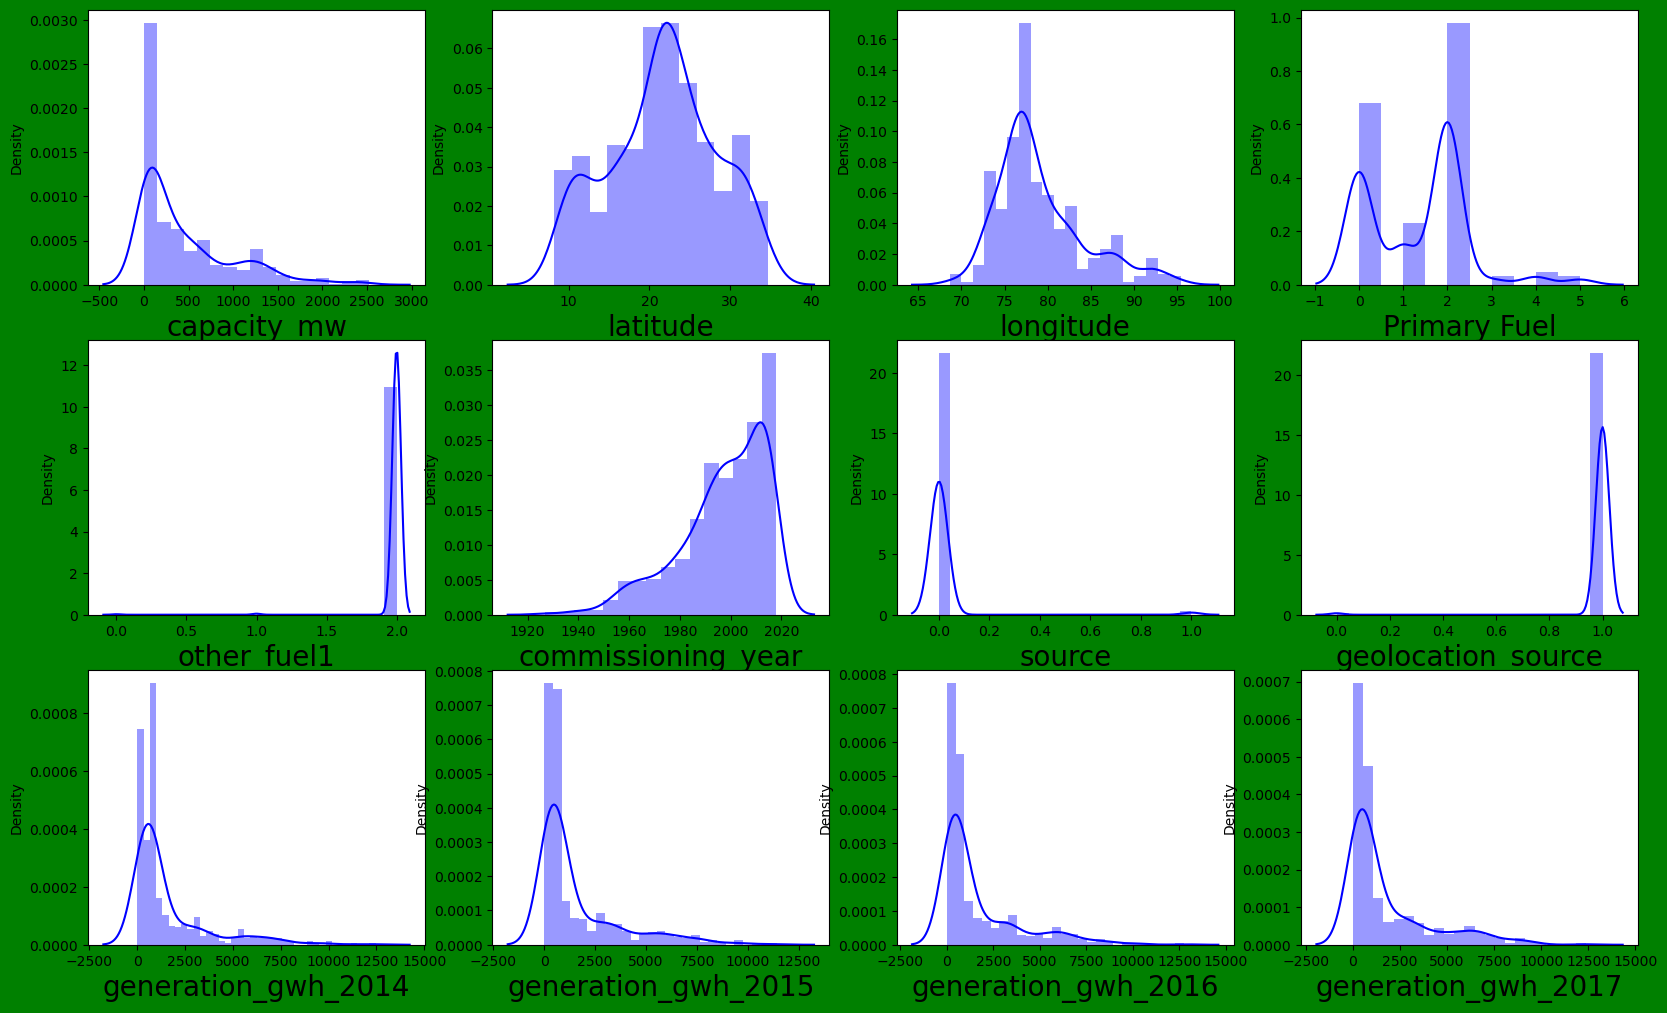

In [74]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 12:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [75]:
df2.skew()

capacity_mw             1.462971
latitude               -0.123261
longitude               1.066760
Primary Fuel            0.494959
other_fuel1           -15.344617
commissioning_year     -1.046822
source                  7.834236
geolocation_source    -11.213571
generation_gwh_2014     2.223974
generation_gwh_2015     1.951075
generation_gwh_2016     1.897950
generation_gwh_2017     1.753959
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of capacity_mw column is 1.462 so the weight in the left tail of the distribution. The skewness of other_fuel1 is -15.344, which indicate that skewness is on the right side and geolocation skewness also direct towards right tail. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [78]:
#Lets remove skewness using log method:

skewed_columns = ['longitude','commissioning_year','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

for i in skewed_columns:
    df2[i]=np.cbrt(df2[i])


In [79]:
df2.skew()

capacity_mw             1.462971
latitude               -0.123261
longitude               0.926753
Primary Fuel            0.494959
other_fuel1           -15.344617
commissioning_year     -1.065720
source                  7.834236
geolocation_source    -11.213571
generation_gwh_2014    -2.260366
generation_gwh_2015    -2.045427
generation_gwh_2016    -2.013760
generation_gwh_2017    -1.978065
dtype: float64

In [ ]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

The heatmap shows the relation between the feature and label with positive and negative correlation. The correlation between capacity_mw and generation_gwh_years(2014,2015,2016,2017) is positive.

The column Primary Fuel with source and commissioning years is less correlated and negatively correlated to geolocation_source, longitude, capacity_mw and all generations


In [ ]:
#After observing the less relevant columns, we will drop them further

df2.drop('other_fuel1',axis=1,inplace=True)
df2.drop('latitude',axis=1,inplace=True)

In [ ]:
df2.skew()

## Prediction for capacity_mw

## Seperating features and label

In [81]:
#Seperating the independent and target variables into x and y
x = df2.drop(['capacity_mw'],axis=1)
y = df2['capacity_mw']

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)


Feature Dimension (512, 11)
Label Dimension (512,)


In [82]:
#once more removing skewness to make sure we are not dealing with high values

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

skewed_columns = ['longitude','commissioning_year']


x[skewed_columns]=scaler.fit_transform(x[skewed_columns].values)
x[skewed_columns].head()



,longitude,commissioning_year
0,0.0,0.856530
3,0.0,0.362804
4,0.0,1.156327
5,0.0,0.431011
6,0.0,-1.556152


In [83]:
x.skew()

latitude               -0.123261
longitude               0.000000
Primary Fuel            0.494959
other_fuel1           -15.344617
commissioning_year     -0.636459
source                  7.834236
geolocation_source    -11.213571
generation_gwh_2014    -2.260366
generation_gwh_2015    -2.045427
generation_gwh_2016    -2.013760
generation_gwh_2017    -1.978065
dtype: float64

## Feature Scaling using Standard Scalarization

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,latitude,longitude,Primary Fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.989155,0.0,3.290359,0.072357,0.856530,7.937254,-11.269428,0.169359,0.151229,0.159727,0.183653
1,0.337552,0.0,-0.280735,0.072357,0.362804,-0.125988,0.088736,0.064603,0.220245,0.231767,0.105209
2,0.048836,0.0,-1.173509,0.072357,1.156327,-0.125988,0.088736,0.756534,1.106592,1.094906,0.980107
3,0.322096,0.0,-1.173509,0.072357,0.431011,-0.125988,0.088736,0.321474,0.369784,0.345553,0.314841
4,-1.689536,0.0,0.612038,0.072357,-1.556152,-0.125988,0.088736,-0.439078,-0.415482,-0.682489,-0.561124
...,...,...,...,...,...,...,...,...,...,...,...
507,-0.679444,0.0,0.612038,0.072357,-0.030895,-0.125988,0.088736,0.169359,0.151229,0.159727,0.183653
508,1.309374,0.0,0.612038,0.072357,-0.458155,-0.125988,0.088736,-0.384806,-0.352727,-0.304207,-0.353147
509,1.279881,0.0,-1.173509,0.072357,0.569717,-0.125988,0.088736,0.780784,0.876358,0.767145,0.737083
510,-1.287503,0.0,2.397585,0.072357,-0.339467,-0.125988,0.088736,-3.511293,-3.448372,-3.330882,0.183653


In [85]:
y.value_counts()

y

0         2.5
3       135.0
4      1800.0
5       250.0
6        60.0
        ...  
892      16.0
893      62.4
899     600.0
901     106.6
902    1600.0
Name: capacity_mw, Length: 512, dtype: float64

## Checking Variance Inflation Factor(VIF)


In [86]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.049807,latitude
1,NaN,longitude
2,1.714877,Primary Fuel
3,1.019537,other_fuel1
4,1.321883,commissioning_year
5,2.391148,source
6,1.992247,geolocation_source
7,2.405201,generation_gwh_2014
8,3.901709,generation_gwh_2015
9,5.104707,generation_gwh_2016


In [87]:
y.value_counts()

1200.0    19
600.0     18
500.0     12
60.0      12
300.0     10
          ..
195.0      1
291.0      1
645.0      1
41.4       1
106.6      1
Name: capacity_mw, Length: 242, dtype: int64

## Creating train test split

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


In [187]:
#finding the best Random state, we are using  regression 

maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAcc, "at random_state",maxRS)

Max r2 score accuracy is  0.8670984285724107 at random_state 83


In [188]:
 x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)


# Modeling

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Building Models

In [190]:
#Model building using different type of regressor by looping them all to get the accuracy of each classifier:

model=[KNeighborsRegressor(),RandomForestRegressor(),LinearRegression(),DecisionTreeRegressor(),
       GradientBoostingRegressor()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x_train,y_train)
    
    print('Accuracy score of :',m)
    
    # prediction
    pred=m.predict(x_test)
    
    print('R2_Score:',r2_score(y_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x,y,cv=5).mean())

    print ("The difference between R2 score and CV is", (r2_score(y_test,pred)-(cross_val_score(m,x,y,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : KNeighborsRegressor()
R2_Score: 0.5529481158243865
MAE: 208.21197142857145
MSE: 136507.20215904832
RMSE: 369.4688108068776
Cross_Validaton_Score 0.5991514207899715
The difference between R2 score and CV is -0.046203304965585
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : RandomForestRegressor()
R2_Score: 0.6977925384999502
MAE: 167.76055068954855
MSE: 92278.9870733543
RMSE: 303.774566205524
Cross_Validaton_Score 0.7299075711172983
The difference between R2 score and CV is -0.03155871136676125
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : LinearRegression()
R2_Score: 0.445616406004112
MAE: 304.7522451528744
MSE: 169280.91798295258
RMSE: 411.437623441212
Cross_Validaton_Score

From the above observation the difference between R2 score and cross validation is least in the Random Forest Regressor, so it is our best model. 

# Hyperparameter Tuning
Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#we choose Random Forest Regressor 

RFR = RandomForestRegressor()
param_grid = {'criterion': ['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[100,200],
             'max_depth':[2,3,4,6]}

grid = GridSearchCV(RFR, param_grid, cv=5)


In [192]:
# Fitting our GridSearchCV Object

grid.fit(x_train, y_train)
print(grid.best_params_)

{'criterion': 'mae', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}


In [193]:
grid.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [194]:
#Create a final model using logistic fit

Final_model =RandomForestRegressor()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x_test)
y_prediction

acc = r2_score(y_test,pred)
print(acc*100)

64.57803393144015


# saving the model


In [195]:
import joblib
joblib.dump(Final_model,"Global_power_model_capacity.pkl")

['Global_power_model_capacity.pkl']

Hence, our Random Forest Model give us accuracy to learn is 64% 

In [197]:
#Lets load the saved model and get the prediction

model = joblib.load("Global_power_model_capacity.pkl")

#Prediction
y_prediction = model.predict(x_test)
y_prediction


array([1024.599     ,   13.51533333,    6.501     ,  580.53      ,
        963.686     ,  533.6924    ,  142.2724    ,  144.535     ,
        164.7535    ,   55.68133333,   49.137     ,   90.06      ,
        144.964     ,  122.685     ,  788.81      ,  235.494     ,
       1304.6       ,   60.26      ,  123.4086    ,  153.4354    ,
       1484.0024    ,  409.5335    ,  540.4062    ,  441.7721    ,
        756.9156    ,   12.377     ,   12.332     ,  573.88544   ,
        181.3272    , 1420.6604    ,  164.356     ,  167.6835    ,
        132.8865    ,  406.99073333, 1278.2992    ,  112.5055    ,
         40.006     ,  305.0434    , 1136.236     ,  143.46896667,
        393.1759    ,  387.2755    ,  153.4865    ,  208.5098    ,
       1190.2028    ,  702.88033333,   10.22666667,  190.5713    ,
        717.58      ,    6.4       ,  127.46      ,  173.929     ,
         10.759     ,  696.24      ,    9.5592    , 1180.766     ,
        156.25996667,   54.773     ,  120.58      ,  344.1135 

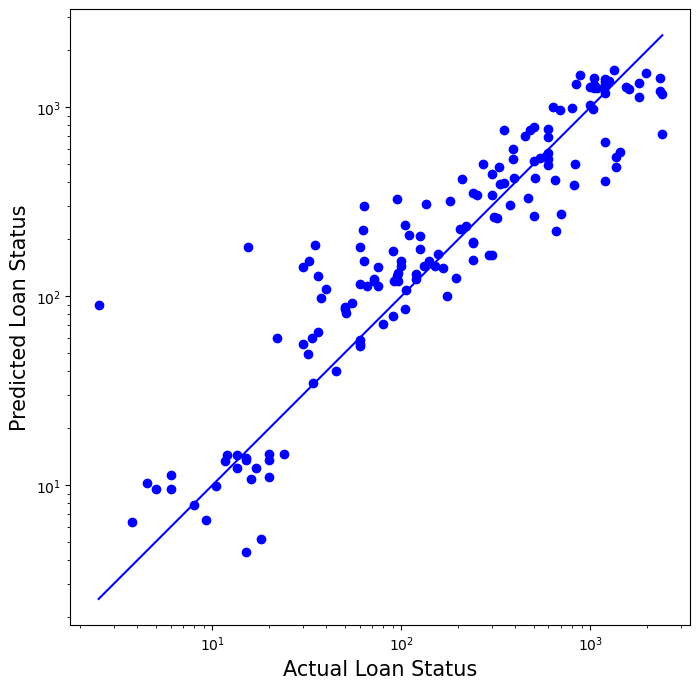

In [198]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_prediction, c='blue')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_prediction), max(y_test))
p2 = min(min(y_prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Loan Status', fontsize=15)
plt.ylabel('Predicted Loan Status', fontsize=15)
plt.axis('equal')
plt.show()

## Prediction for Primary Fuel

## Seperating features and label

In [96]:
#Seperating the independent and target variables into x and y
x2 = df2.drop(['Primary Fuel'],axis=1)
y2 = df2['Primary Fuel']

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (512, 11)
Label Dimension (512,)


In [97]:
x2.skew()

capacity_mw             1.462971
latitude               -0.123261
longitude               0.926753
other_fuel1           -15.344617
commissioning_year     -1.065720
source                  7.834236
geolocation_source    -11.213571
generation_gwh_2014    -2.260366
generation_gwh_2015    -2.045427
generation_gwh_2016    -2.013760
generation_gwh_2017    -1.978065
dtype: float64

In [98]:
#once more removing skewness to make sure we are not dealing with high values

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [99]:
skewed_columns = ['longitude','commissioning_year']


x2[skewed_columns]=scaler.fit_transform(x2[skewed_columns].values)
x2[skewed_columns].head()


,longitude,commissioning_year
0,0.0,0.856530
3,0.0,0.362804
4,0.0,1.156327
5,0.0,0.431011
6,0.0,-1.556152


In [100]:
x2.skew()

capacity_mw             1.462971
latitude               -0.123261
longitude               0.000000
other_fuel1           -15.344617
commissioning_year     -0.636459
source                  7.834236
geolocation_source    -11.213571
generation_gwh_2014    -2.260366
generation_gwh_2015    -2.045427
generation_gwh_2016    -2.013760
generation_gwh_2017    -1.978065
dtype: float64

## Feature Scaling using Standard Scalarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2 = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x2

In [101]:
y2.value_counts()

y2

0      5
3      1
4      0
5      0
6      2
      ..
892    2
893    2
899    0
901    4
902    0
Name: Primary Fuel, Length: 512, dtype: int32

## Checking Variance Inflation Factor(VIF)


In [131]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.049807,latitude
1,NaN,longitude
2,1.714877,Primary Fuel
3,1.019537,other_fuel1
4,1.321883,commissioning_year
5,2.391148,source
6,1.992247,geolocation_source
7,2.405201,generation_gwh_2014
8,3.901709,generation_gwh_2015
9,5.104707,generation_gwh_2016


# Oversampling

We need to do oversampling in this case



In [132]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x2,y2=SM.fit_resample(x2,y2)


In [133]:
y2.value_counts()

5    251
1    251
0    251
2    251
4    251
3    251
Name: Primary Fuel, dtype: int64

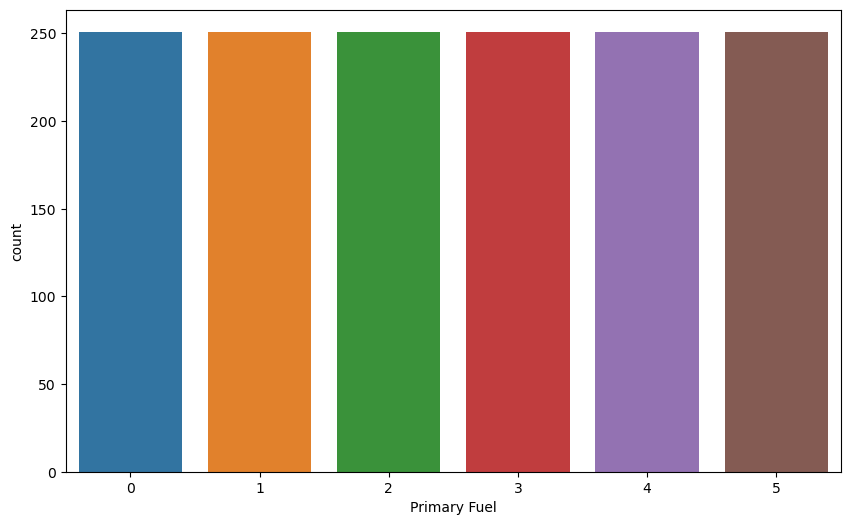

In [134]:
#visualize the data after balancing

plt.figure(figsize=(10,6))
sns.countplot(y2)
plt.show()

# Modeling

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeClassifier


In [163]:
#finding the best Random state, we are using regression 

maxAcc = 0
maxRS = 0
for i in range(1,200):
    x2_train, x2_test, y2_train,y2_test = train_test_split(x2,y2,test_size = 0.25, random_state = i)
    RF=RandomForestRegressor()
    RF.fit(x2_train, y2_train)
    pred = lr.predict(x2_test)
    acc = r2_score(y2_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAcc, "at random_state",maxRS)

Max r2 score accuracy is  0.709792148893054 at random_state 159


In [164]:
x2_train, x2_test, y2_train,y2_test = train_test_split(x2,y2,test_size = 0.30, random_state = i)


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [201]:
# Building Models

#Model building using different type of regressor by looping them all to get the accuracy of each classifier:

model=[KNeighborsRegressor(),RandomForestRegressor(),LinearRegression(),DecisionTreeRegressor(),
       GradientBoostingRegressor()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x2_train,y2_train)
    
    print('Accuracy score of :',m)
    
    # prediction
    pred=m.predict(x2_test)
    
    print('R2_Score:',r2_score(y2_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y2_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y2_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y2_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x2,y2,cv=5).mean())

    print ("The difference between R2 score and CV is", (r2_score(y2_test,pred)-(cross_val_score(m,x2,y2,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    




--------------------------------------------------------------------
Accuracy score of : KNeighborsRegressor()
R2_Score: 0.5043214157767766
MAE: 0.8039823008849557
MSE: 1.3747787610619469
RMSE: 1.1725095995606802
Cross_Validaton_Score -10.567596924424755
The difference between R2 score and CV is 11.071918340201531
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : RandomForestRegressor()
R2_Score: 0.8994575738163182
MAE: 0.2746238938053097
MSE: 0.27885730088495575
RMSE: 0.5280694091546638
Cross_Validaton_Score 0.2579940808810638
The difference between R2 score and CV is 0.6371021270017634
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : LinearRegression()
R2_Score: 0.6396130534619194
MAE: 0.7819422842679791
MSE: 0.9995435260551804
RMSE: 0.9997717369755861
Cross_Valida

From the above observation the difference between R2 score and cross validation is least in the RandomForestRegressor, so it is our best model. 


#  Hyperparameter Tuning
Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data


In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [205]:
#we choose Random Forest Regressor 

RFR = RandomForestRegressor()
param_grid = {'criterion': ['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[100,200],
             'max_depth':[2,3,4,6]}

grid = GridSearchCV(RFR, param_grid, cv=5)


In [206]:
# Fitting our GridSearchCV Object
grid.fit(x2_train, y2_train)

print('Best parameter:', grid.best_params_)

Best parameter: {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


In [207]:

#Create a final model using Random Forest fit

Final_model2 = RandomForestRegressor()

Final_model2.fit(x2_train,y2_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x2_test)
y_prediction

acc = r2_score(y2_test,pred)
print(acc*100)


85.95119503074602


# saving the model


In [217]:
import joblib

joblib.dump(Final_model2,"Global_power_Fuel__model.pkl")

['Global_power_Fuel__model.pkl']

Hence, the best predicted model for Primary Fuel prediction is Random Forest Regressor, our model learns up to 85%

# Predicting the saved model


In [ ]:
#Lets load the saved model and get the prediction


model2 = joblib.load(Final_model2,'Global_power_Fuel__model.pkl')

#Prediction
y2_prediction = model2.predict(x2_test)
y2_prediction


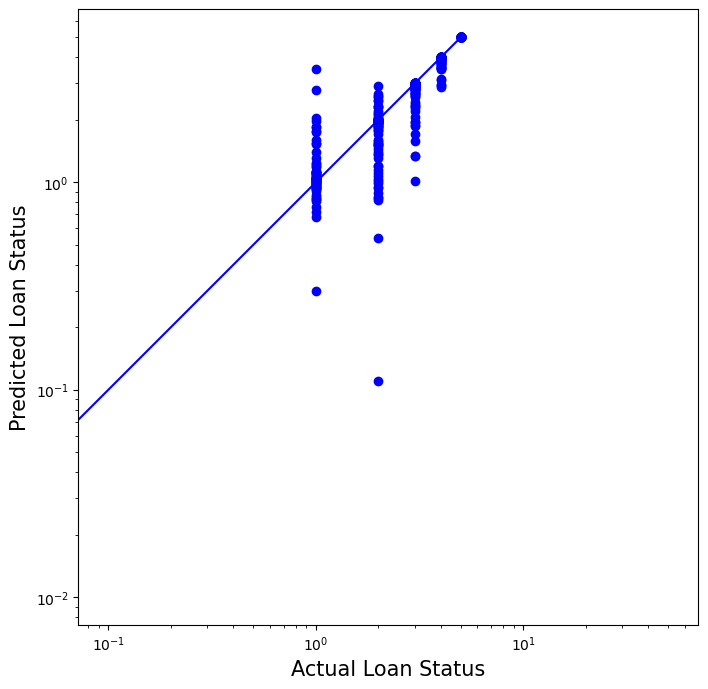

In [226]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(8,8))
plt.scatter(y2_test, y_prediction, c='blue')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_prediction), max(y2_test))
p2 = min(min(y_prediction), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Loan Status', fontsize=15)
plt.ylabel('Predicted Loan Status', fontsize=15)
plt.axis('equal')
plt.show()

In [227]:
a= np.array(y2_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

,Predicted,Original
0,0.04,0
1,1.01,1
2,1.19,2
3,3.78,4
4,1.08,1
...,...,...
447,0.82,2
448,2.87,3
449,1.58,3
450,5.00,5


Our RandomForest Regressor model does the best accuracy of 85% hence, this is the best model to evaluate the result of Primary Fuel model.  